In [1]:
# PYTHON IMPORTS
import os, copy, traceback
from tqdm.notebook import trange, tqdm
import glob

# IMAGE IMPORTS 
from PIL import Image
import cv2, tifffile

# DATA IMPORTS 
import random
import h5py
import numpy as np

# PLOTTING
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# NEURAL NETWORK
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms, datasets
from torchvision.transforms import ToPILImage, GaussianBlur
from torchvision.transforms import Compose, RandomCrop, ToTensor, Normalize
import torch.optim.lr_scheduler as lr_scheduler
import torchvision.models as models
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# MY OWN CLASSES
from TPNN import *
from PlottingUtils import *
from DataUtils import * 

Image.MAX_IMAGE_PIXELS = 933120000
%matplotlib notebook

In [2]:
base_dir = r"C:\Users\fhacesga\OneDrive - University Of Houston\AAA_RECTDNN\data"

input_folder        = f"{base_dir}/TPNN/zzz_new/in"
train_target_folder = f"{base_dir}/TPNN/zzz_new/out"

batch_size          = 4
verbose_level       = 0

tensor = transforms.Compose([
    transforms.ToTensor(),
])

transform = transforms.Compose([
    transforms.RandomRotation(degrees=180, expand=True),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.ToTensor(),
])

train_dataset = NN_Multiclass(input_folder, train_target_folder, transform=transform, only_true=True,
                             n_pyramids=3)
train_loader  = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=0)

  0%|          | 0/2 [00:00<?, ?it/s]

datetime.datetime(2023, 9, 15, 23, 53, 3, 630126)

<IPython.core.display.Javascript object>


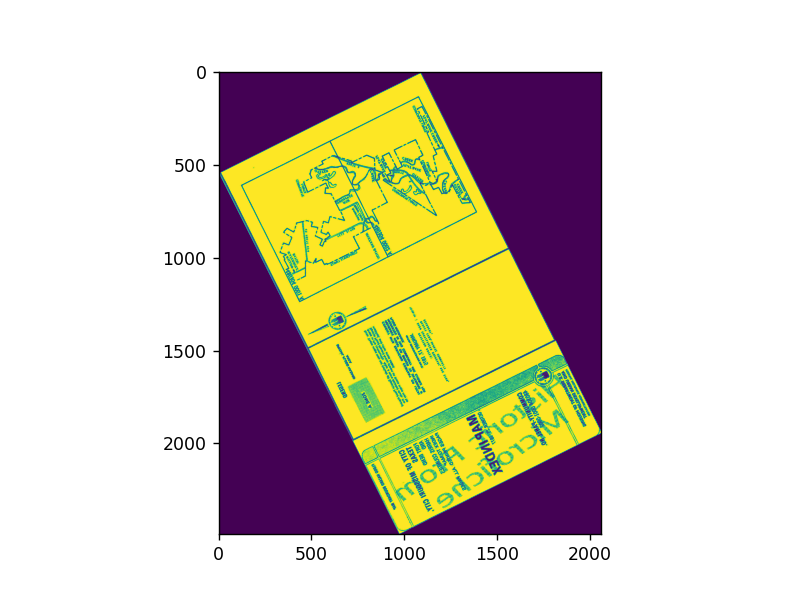

0:00:00.164031


<IPython.core.display.Javascript object>


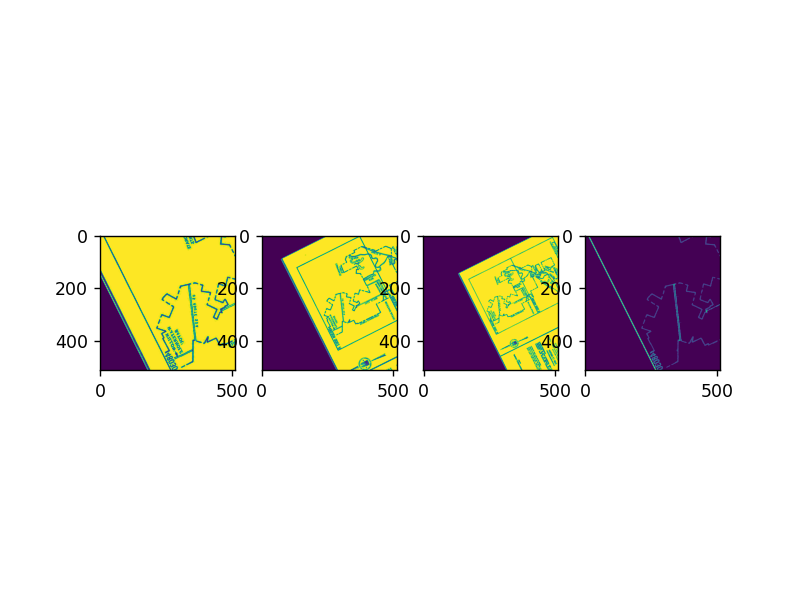

In [5]:
start = datetime.now()
a, b,c = train_dataset[0]
print(datetime.now() - start)
fig, axs = plt.subplots(1, 4)

axs[0].imshow(a[0, :, :])
axs[1].imshow(a[1, :, :])
axs[2].imshow(a[2, :, :])
axs[3].imshow(b)